In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.linalg import eigh
import numpy as np

In [2]:
mnist = load_digits()

In [23]:
data = mnist['data']

In [24]:
data.shape

(1797, 64)

In [25]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

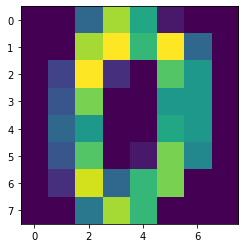

In [5]:
plt.imshow(mnist['images'][0])

In [6]:
scaler = StandardScaler()

In [7]:
scaled_data = scaler.fit_transform(data)

In [8]:
scaled_data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [9]:
pca = PCA(n_components=2)

In [10]:
pcaed = pca.fit_transform(scaled_data)

In [11]:
pcaed.T.shape

(2, 1797)

In [12]:
mnist['target'].shape

(1797,)

In [13]:
type(pcaed.T)

numpy.ndarray

In [14]:
df = pd.DataFrame(pcaed, columns=['pca1','pca2'])


In [15]:
df['label'] = mnist['target']

In [16]:
df.head

<bound method NDFrame.head of           pca1      pca2  label
0     1.914203 -0.954554      0
1     0.589003  0.924759      1
2     1.302032 -0.317256      2
3    -3.020763 -0.868718      3
4     4.528924 -1.093619      4
...        ...       ...    ...
1792  0.104347  0.255106      9
1793  2.423242 -1.429591      0
1794  1.022616 -0.147769      8
1795  1.076074 -0.380798      9
1796 -1.257710 -2.227593      8

[1797 rows x 3 columns]>

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


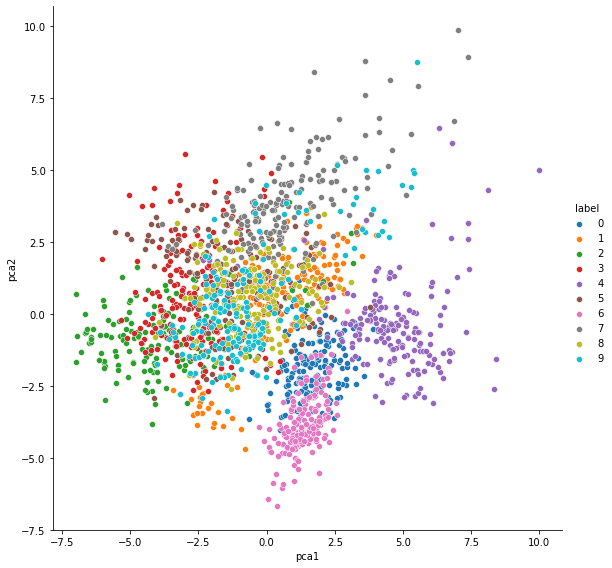

In [17]:
sns.FacetGrid(df, hue = 'label', size = 8).map(sns.scatterplot, 'pca1', 'pca2').add_legend()
plt.show()

## PCA from scratch

In [18]:
scaled_data.shape

(1797, 64)

In [29]:
#find the co-variance matrix which is : A^T * A
covar_mat = np.matmul(scaled_data.T, scaled_data)

In [28]:
covar_mat.shape

(64, 64)

In [60]:
# the parameter ‘eigvals’ is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectores = eigh(covar_mat, eigvals=(62, 63))

In [61]:
values.shape

(2,)

In [62]:
vectores.shape

(64, 2)

In [63]:
new_data = np.matmul(scaled_data, vectores)

In [64]:
new_data.shape

(1797, 2)

In [65]:
df2 = pd.DataFrame(new_data,columns=['pca1', 'pca2'])

In [66]:
df2['label'] = mnist['target']

In [67]:
df2.head

<bound method NDFrame.head of           pca1      pca2  label
0     0.954502  1.914214      0
1    -0.924636  0.588980      1
2     0.317189  1.302039      2
3     0.868772 -3.020770      3
4     1.093480  4.528949      4
...        ...       ...    ...
1792 -0.255024  0.104331      9
1793  1.429611  2.423234      0
1794  0.147911  1.022596      8
1795  0.380906  1.076055      9
1796  2.227591 -1.257702      8

[1797 rows x 3 columns]>

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


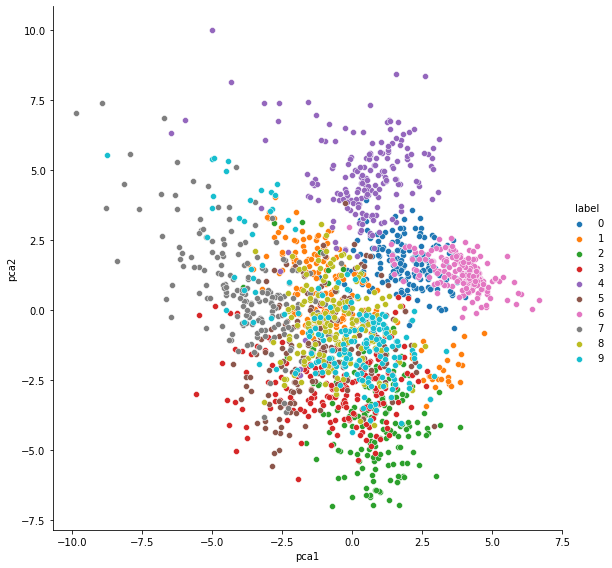

In [68]:
sns.FacetGrid(df2, hue='label',size=8).map(sns.scatterplot, 'pca1','pca2').add_legend()